In [90]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [91]:
#importing the dataset
covid_data = pd.read_csv("../input/covid19/covid19_Confirmed_dataset.csv")
covid_death = pd.read_csv("..//input/covid19/covid19_deaths_dataset.csv")
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [92]:
#Check the shape of dataframe
covid_data.shape

(266, 104)

In [93]:
covid_data.drop(['Lat','Long'],axis=1,inplace=True)

In [94]:
covid_data_agg = covid_data.groupby(by='Country/Region').sum()
covid_data_agg.shape

(187, 100)

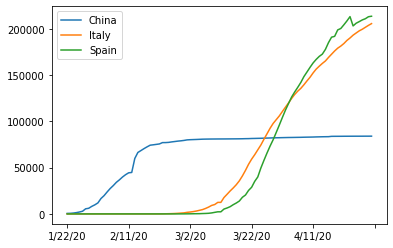

In [95]:
covid_data_agg.loc["China"].plot()
covid_data_agg.loc["Italy"].plot()
covid_data_agg.loc["Spain"].plot()
plt.legend()

<AxesSubplot:>

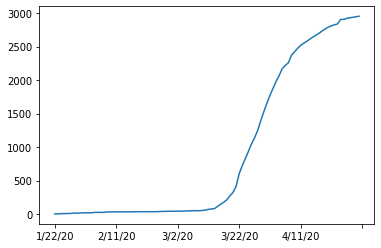

In [96]:
covid_data_agg.loc["Thailand"].plot()

<AxesSubplot:>

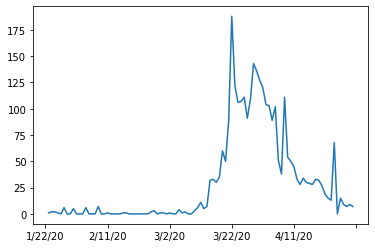

In [97]:
covid_data_agg.loc["Thailand"].diff().plot()

In [98]:
#create max infection of countries column
countries = list(covid_data_agg.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(covid_data_agg.loc[c].diff().max())
covid_data_agg["max_infection_rate"] = max_infection_rates


In [99]:
#create average infection of countries column
countries = list(covid_data_agg.index)
avg_infection_rates = []
for c in countries:
    avg_infection_rates.append(covid_data_agg.loc[c].mean())
covid_data_agg["Avg_infection_rate"] = avg_infection_rates

In [100]:
covid_data_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate,Avg_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,232.0,284.099010
Albania,0,0,0,0,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,34.0,177.207921
Algeria,0,0,0,0,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,199.0,737.861386
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,43.0,217.188119
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,5.0,6.475248


In [101]:
corona_data = pd.DataFrame(covid_data_agg[["max_infection_rate","Avg_infection_rate"]])

In [102]:
corona_data.head()

,max_infection_rate,Avg_infection_rate
Country/Region,,
Afghanistan,232.0,284.099010
Albania,34.0,177.207921
Algeria,199.0,737.861386
Andorra,43.0,217.188119
Angola,5.0,6.475248


In [103]:
# importing the dataset
world_happiness_csv = pd.read_csv("../input/covid19/worldwide_happiness_report.csv")

In [104]:
world_happiness_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [105]:
world_happiness_csv.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [106]:
world_happiness_csv.drop(["Overall rank", "Score", "Generosity","Perceptions of corruption"],axis=1,inplace=True)
world_happiness_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [107]:
# change the indices of the dataframe using df.set_index()
world_happiness_csv.set_index("Country or region", inplace=True)

In [108]:
print("Shape of Corona Dataframe = ",corona_data.shape)
print("Shape of Happiness report Dataframe = ",world_happiness_csv.shape)

Shape of Corona Dataframe =  (187, 2)
Shape of Happiness report Dataframe =  (156, 4)


In [109]:
# rows of corona data is higher so using inner join 
df = corona_data.join(world_happiness_csv,how='inner')
df.head()

,max_infection_rate,Avg_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,284.099010,0.350,0.517,0.361,0.000
Albania,34.0,177.207921,0.947,0.848,0.874,0.383
Algeria,199.0,737.861386,1.002,1.160,0.785,0.086
Argentina,291.0,835.603960,1.092,1.432,0.881,0.471
Armenia,134.0,403.405941,0.850,1.055,0.815,0.283


In [110]:
df.describe()

,max_infection_rate,Avg_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1089.944056,3610.169355,0.892392,1.201986,0.728902,0.393748
std,3120.702758,10811.684333,0.401240,0.306334,0.230101,0.146585
min,1.000000,0.019802,0.000000,0.000000,0.105000,0.000000
25%,31.000000,53.767327,0.576000,1.036000,0.544500,0.300500
50%,107.000000,314.524752,0.960000,1.274000,0.789000,0.418000
75%,530.500000,1728.886139,1.203500,1.447000,0.877500,0.508000
max,26849.000000,66357.168317,1.684000,1.624000,1.141000,0.631000


In [111]:
df.corr()

,max_infection_rate,Avg_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.768108,0.250118,0.191958,0.289263,0.078196
Avg_infection_rate,0.768108,1.000000,0.280145,0.184045,0.317103,0.043350
GDP per capita,0.250118,0.280145,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.184045,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.317103,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.043350,0.394603,0.456246,0.427892,1.000000


## **Plots for Visualisation**

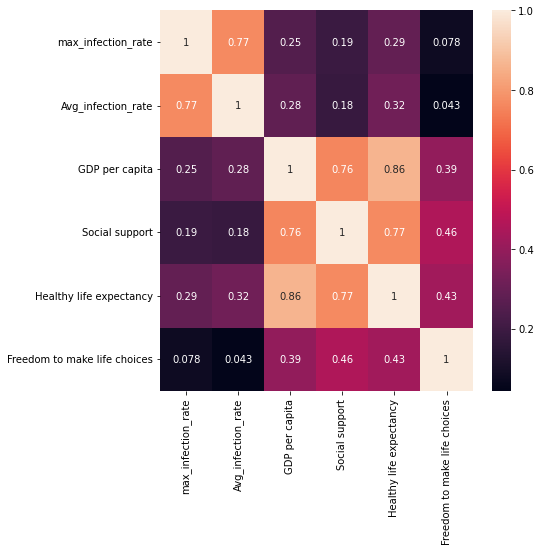

In [112]:
## Heat map for correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(df.corr(), annot=True)

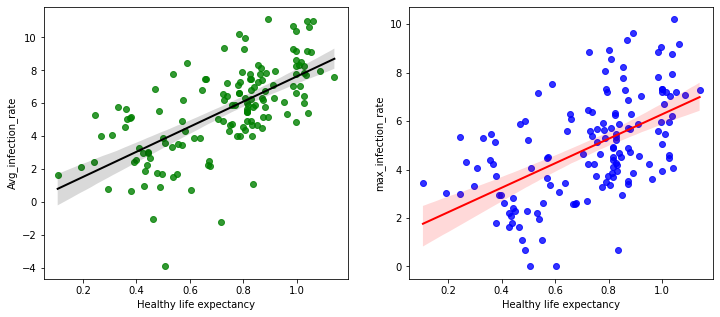

In [113]:
## Plotting Healthy life expectancy vs infection rate

fig, ax = plt.subplots(nrows =1,ncols = 2,figsize=(12, 5))
X = df["Healthy life expectancy"]
Y = np.log(df["Avg_infection_rate"])
sns.regplot(ax = ax[0], x = X,y = Y,line_kws= {"lw" : 2,"color" : "black"},scatter_kws= {"color" : "green"});
X = df["Healthy life expectancy"]
Y = np.log(df["max_infection_rate"])
sns.regplot(ax = ax[1], x = X,y = Y,line_kws= {"lw" : 2,"color" : "red"},scatter_kws= {"color" : "blue"});

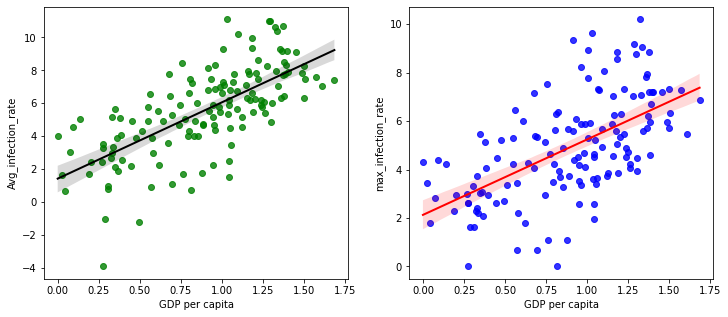

In [114]:
## Plotting GDP per capita vs infection rate

fig, ax = plt.subplots(nrows =1,ncols = 2,figsize=(12, 5))
X = df["GDP per capita"]
Y = np.log(df["Avg_infection_rate"])
sns.regplot(ax = ax[0], x = X,y = Y,line_kws= {"lw" : 2,"color" : "black"},scatter_kws= {"color" : "green"});
X = df["GDP per capita"]
Y = np.log(df["max_infection_rate"])
sns.regplot(ax = ax[1], x = X,y = Y,line_kws= {"lw" : 2,"color" : "red"},scatter_kws= {"color" : "blue"});

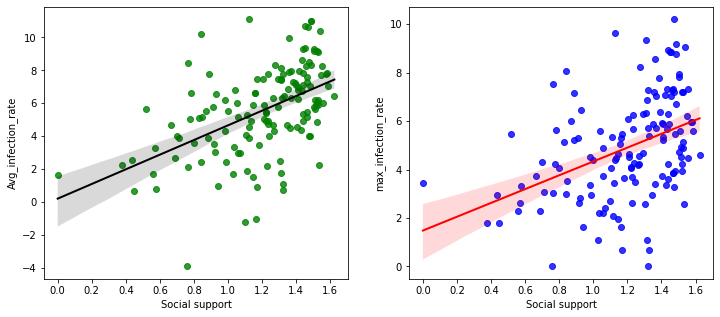

In [115]:
## Plotting Social support vs infection rate

fig, ax = plt.subplots(nrows =1,ncols = 2,figsize=(12, 5))
X = df["Social support"]
Y = np.log(df["Avg_infection_rate"])
sns.regplot(ax = ax[0], x = X,y = Y,line_kws= {"lw" : 2,"color" : "black"},scatter_kws= {"color" : "green"});
X = df["Social support"]
Y = np.log(df["max_infection_rate"])
sns.regplot(ax = ax[1], x = X,y = Y,line_kws= {"lw" : 2,"color" : "red"},scatter_kws= {"color" : "blue"});

In [116]:
covid_death.shape

(266, 104)

In [117]:
covid_death.drop(['Lat','Long'],axis=1,inplace=True)
covid_death_agg = covid_death.groupby(by='Country/Region').sum()
covid_death_agg.shape

(187, 100)

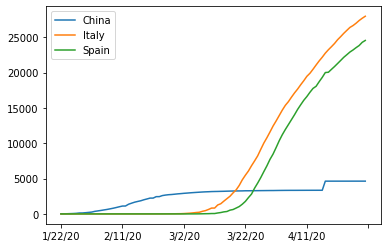

In [118]:
covid_death_agg.loc["China"].plot()
covid_death_agg.loc["Italy"].plot()
covid_death_agg.loc["Spain"].plot()
plt.legend()

In [119]:
#create max infection of countries column
countries = list(covid_death_agg.index)
max_death_rates = []
for c in countries:
    max_death_rates.append(covid_death_agg.loc[c].diff().max())
covid_death_agg["max_death_rate"] = max_death_rates

In [120]:
corona_death = pd.DataFrame(covid_death_agg[["max_death_rate"]])

In [122]:
corona_death.head()

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [123]:
df2 = corona_death.join(world_happiness_csv,how='inner')
df2.head()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


In [143]:
df2.corr()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


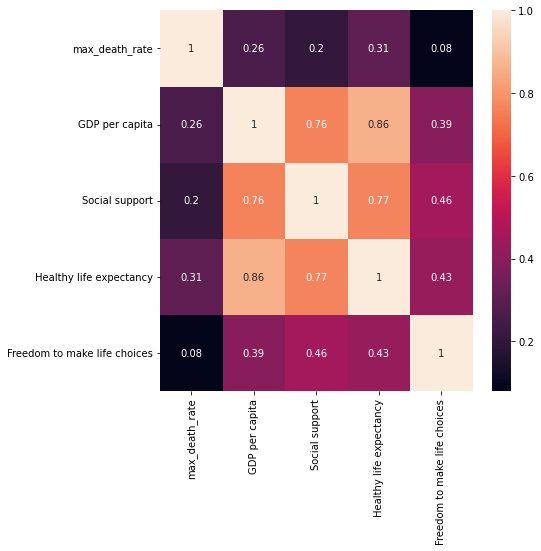

In [124]:
## Heat map for correlation matrix on death

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(df2.corr(), annot=True)

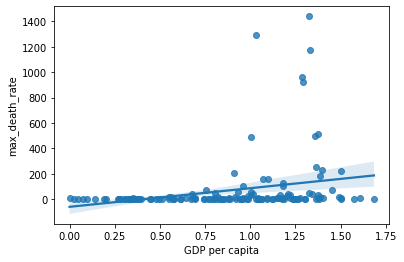

In [142]:
## Plotting GDP per capita vs infection rate

X = df2["GDP per capita"]
Y = df2["max_death_rate"]
sns.regplot(x = X,y = Y);
